# PROJECT: CREDIT-SCORE CLASSIFICATION

![](money-256319_1280.jpg)

### Importing essential Libraries.


In [3]:
import pandas as pd
import numpy as np

### Loading the Dataset.

In [4]:
df=pd.read_csv("Credit Score Classification Dataset.csv")
df.sample(4)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
86,34,Male,47500,Associate's Degree,Single,0,Rented,Average
61,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
128,28,Male,75000,Bachelor's Degree,Single,0,Rented,Average


### Checking the information about columns

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_avg= df[df['Credit Score']=="Average"]

In [7]:
df_avg2=df[df['Credit Score']=="Low"]
df_avg3=df[df['Credit Score']=="High"]

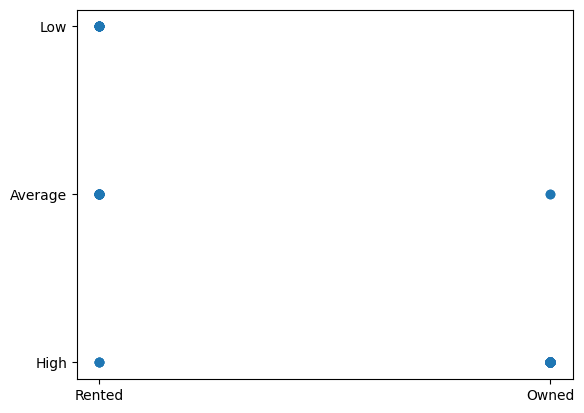

In [8]:

plt.scatter(df['Home Ownership'],df['Credit Score'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


### Checking the number of missing values.

In [12]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

### change  categorical data into intigar value

In [13]:
 from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Home Ownership']=le.fit_transform(df['Home Ownership'])
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,High
1,30,1,100000,4,0,2,0,High
2,35,0,75000,2,0,1,0,High
3,40,1,125000,3,1,0,0,High
4,45,0,100000,1,0,3,0,High
...,...,...,...,...,...,...,...,...
159,29,0,27500,3,1,0,1,Low
160,34,1,47500,0,1,0,1,Average
161,39,0,62500,1,0,2,0,High
162,44,1,87500,4,1,0,0,High


#### Seperating x as input label and y as output label

In [19]:
X=df.drop("Credit Score",axis=1)
Y=df['Credit Score']

In [20]:
X

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,0,50000,1,1,0,1
1,30,1,100000,4,0,2,0
2,35,0,75000,2,0,1,0
3,40,1,125000,3,1,0,0
4,45,0,100000,1,0,3,0
...,...,...,...,...,...,...,...
159,29,0,27500,3,1,0,1
160,34,1,47500,0,1,0,1
161,39,0,62500,1,0,2,0
162,44,1,87500,4,1,0,0


In [21]:
Y

0         High
1         High
2         High
3         High
4         High
        ...   
159        Low
160    Average
161       High
162       High
163       High
Name: Credit Score, Length: 164, dtype: object

### Use RandomForest for train data &cross_val_score for  evaluating model performance

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()

scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
average_score = np.mean(scores)
print(f'Average Accuracy: {average_score}')


Average Accuracy: 0.9753787878787878


### Use KNeighborsClassifier for train data &cross_val_score for evaluating model performance

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
print(scores)
average_score = np.mean(scores)

print(f'Average Accuracy: {average_score}')


[0.93939394 0.96969697 1.         0.93939394 0.9375    ]
Average Accuracy: 0.9571969696969698


### Use SVM for train data &cross_val_score for evaluating model performance

In [24]:
from sklearn.svm import SVC
import numpy as np
model_svm=SVC()
scores = cross_val_score(model_svm, X, Y, cv=10, scoring='accuracy')
print(scores)

average_score = np.mean(scores)

print(f'Average Accuracy: {average_score}')


[0.94117647 0.76470588 1.         0.88235294 0.9375     0.9375
 0.9375     0.875      0.875      0.9375    ]
Average Accuracy: 0.9088235294117647


## RESULT : RandomForestClassifier has higher accuracy score so that it is best model